# Delhivery - Feature engg

In [28]:
import  pandas as pd

In [4]:
df= pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [6]:
df.head(4)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000


# Handling Outliers

In [30]:

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]


df = df_cleaned
df.head()


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,trip_year,trip_month,trip_day,trip_hour,trip_weekday,od_diff_time,trip_duration
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.270270,0.227365,0.353535,2018,9,20,2,3,1,1.436894
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.216216,0.184145,0.308642,2018,9,20,2,3,1,1.436894
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.162162,0.204835,0.634921,2018,9,20,2,3,1,1.436894
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.297297,0.248073,0.486111,2018,9,20,2,3,1,1.436894
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,0.270270,0.230339,0.378788,2018,9,20,2,3,2,1.819553


## Extracting features like month, year and day

In [9]:
df.groupby('trip_creation_time').count()

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
trip_creation_time,,,,,,,,,,,,,,,,,,,,,
2018-09-12 00:00:16.535741,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
2018-09-12 00:00:22.886430,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
2018-09-12 00:00:33.691250,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
2018-09-12 00:01:00.113710,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2018-09-12 00:02:09.740725,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-03 23:55:56.258533,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
2018-10-03 23:57:23.863155,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2018-10-03 23:57:44.429324,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Handling missing values

In [10]:

df['source_center'] = df['source_center'].fillna('Unknown') 
df['actual_time'] = df['actual_time'].fillna(df['actual_time'].median()) 
df['segment_actual_time'] = df['segment_actual_time'].fillna(df['segment_actual_time'].mean())  

print("Data after handling missing values:")
df.head(10)

Data after handling missing values:


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
10,training,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,FTL,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,...,2018-09-23 11:05:19,23.194334,38.0,24.0,26.8622,1.583333,38.0,24.0,26.8622,1.583333
11,training,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,FTL,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,...,2018-09-23 10:27:22,44.045659,76.0,41.0,54.4326,1.853659,37.0,27.0,30.1058,1.370370


## Merging rows using aggregate function


In [11]:
grouped = df.groupby(['trip_uuid','source_center','destination_center']).aggregate({
    'actual_time':"last",
    'segment_actual_time':['sum']
})

grouped.head()

actual_time  \
                                                                last   
trip_uuid               source_center destination_center               
trip-153671041653548748 IND209304AAA  IND000000ACB             732.0   
                        IND462022AAA  IND209304AAA             807.0   
trip-153671042288605164 IND561203AAB  IND562101AAA              47.0   
                        IND572101AAA  IND561203AAB              76.0   
trip-153671043369099517 IND000000ACB  IND160002AAC             336.0   

                                                         segment_actual_time  
                                                                         sum  
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND209304AAA  IND000000ACB                     436.0  
                        IND462022AAA  IND209304AAA                     563.0  
trip-153671042288605164 IND561203AAB  IND562101AAA                      46.0  
                        IND572101AAA  IND561203AAB                      75.0  
trip-153671043369099517 IND000000ACB  IND160002AAC                     333.0

# Extract Features from Trip Creation Time

In [12]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [13]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'], errors='coerce')


df['trip_year'] = df['trip_creation_time'].dt.year
df['trip_month'] = df['trip_creation_time'].dt.month
df['trip_day'] = df['trip_creation_time'].dt.day
df['trip_hour'] = df['trip_creation_time'].dt.hour
df['trip_weekday'] = df['trip_creation_time'].dt.weekday
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_year,trip_month,trip_day,trip_hour,trip_weekday
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.272727,14.0,11.0,11.9653,1.272727,2018,9,20,2,3
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.200000,10.0,9.0,9.7590,1.111111,2018,9,20,2,3
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.428571,16.0,7.0,10.8152,2.285714,2018,9,20,2,3
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.550000,21.0,12.0,13.0224,1.750000,2018,9,20,2,3
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.545455,6.0,5.0,3.9153,1.200000,2018,9,20,2,3


# In-depth analysis and feature engineering:


 ### 1. Calculate time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required


In [14]:

df['od_end_time'] = pd.to_datetime(df['od_end_time'], errors='coerce')
df['od_start_time'] = pd.to_datetime(df['od_start_time'], errors='coerce')

df['od_diff_time'] = df['od_end_time'].dt.hour - df['od_start_time'].dt.hour

df.head()


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_year,trip_month,trip_day,trip_hour,trip_weekday,od_diff_time
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,1.272727,2018,9,20,2,3,1
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.0,9.0,9.7590,1.111111,2018,9,20,2,3,1
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,16.0,7.0,10.8152,2.285714,2018,9,20,2,3,1
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.0,12.0,13.0224,1.750000,2018,9,20,2,3,1
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,6.0,5.0,3.9153,1.200000,2018,9,20,2,3,1


### 2. Hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value

In [15]:

aggregated_df = df.groupby('trip_uuid').agg(
    actual_time=('actual_time', 'sum'),  
    OSRM_time=('osrm_time', 'sum')        
).reset_index()

aggregated_df.head()


,trip_uuid,actual_time,OSRM_time
0,trip-153671041653548748,12475.0,6109.0
1,trip-153671042288605164,303.0,168.0
2,trip-153671043369099517,15716.0,9526.0
3,trip-153671046011330457,23.0,9.0
4,trip-153671052974046625,215.0,90.0


### 3. Hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value 

In [16]:

aggregated_df = df.groupby('trip_uuid').agg(
    actual_time=('actual_time', 'sum'),
    Segment_actual_time=('segment_actual_time', 'sum')
).reset_index()

aggregated_df.head()


,trip_uuid,actual_time,Segment_actual_time
0,trip-153671041653548748,12475.0,999.0
1,trip-153671042288605164,303.0,121.0
2,trip-153671043369099517,15716.0,1187.0
3,trip-153671046011330457,23.0,23.0
4,trip-153671052974046625,215.0,173.0


### 4 .Hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value

In [17]:

aggregated_df = df.groupby('trip_uuid').agg(
    actual_time=('actual_time', 'sum'),
    Segment_OSRM_Distance=('segment_osrm_distance', 'sum')
).reset_index()

aggregated_df.head()


,trip_uuid,actual_time,Segment_OSRM_Distance
0,trip-153671041653548748,12475.0,869.0847
1,trip-153671042288605164,303.0,80.3820
2,trip-153671043369099517,15716.0,939.5833
3,trip-153671046011330457,23.0,11.9675
4,trip-153671052974046625,215.0,95.6076


### 5. Hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value

In [18]:

aggregated_df = df.groupby('trip_uuid').agg(
    actual_time=('actual_time', 'sum'),
    Segment_OSRM_time=('segment_osrm_time', 'sum')
).reset_index()

aggregated_df.head()


,trip_uuid,actual_time,Segment_OSRM_time
0,trip-153671041653548748,12475.0,634.0
1,trip-153671042288605164,303.0,62.0
2,trip-153671043369099517,15716.0,712.0
3,trip-153671046011330457,23.0,9.0
4,trip-153671052974046625,215.0,72.0


##  Normalization with MinMaxScaler

In [19]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()


numerical_columns = df.select_dtypes(include=['float64', 'int64','bool']).columns


df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


df.head()


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_year,trip_month,trip_day,trip_hour,trip_weekday,od_diff_time
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.200000,0.270270,0.227365,0.353535,2018,9,20,2,3,1
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.142857,0.216216,0.184145,0.308642,2018,9,20,2,3,1
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.228571,0.162162,0.204835,0.634921,2018,9,20,2,3,1
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.300000,0.297297,0.248073,0.486111,2018,9,20,2,3,1
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.085714,0.108108,0.069670,0.333333,2018,9,20,2,3,1


## Comparison & Visualization of Time & Distance Fields

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


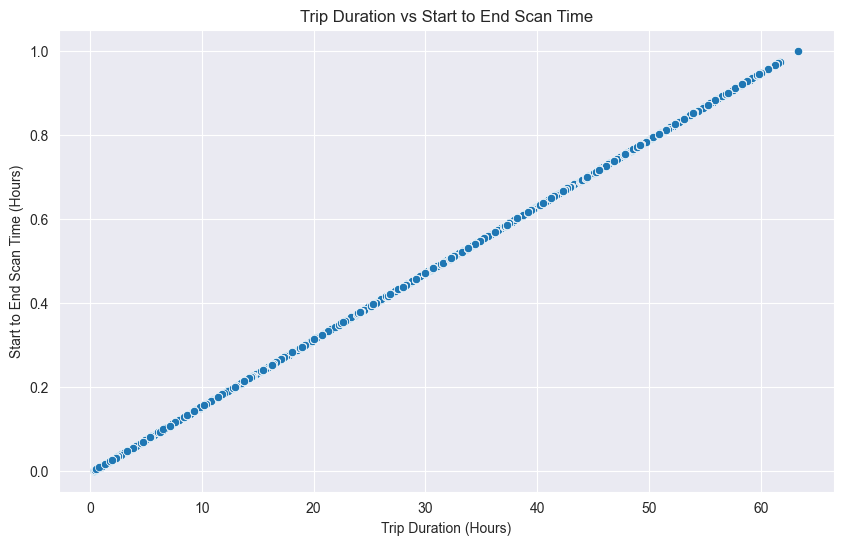

Hypothesis Test (Actual Time vs OSRM Time): t-stat=-12.672027083825787, p-value=8.72686709796888e-37


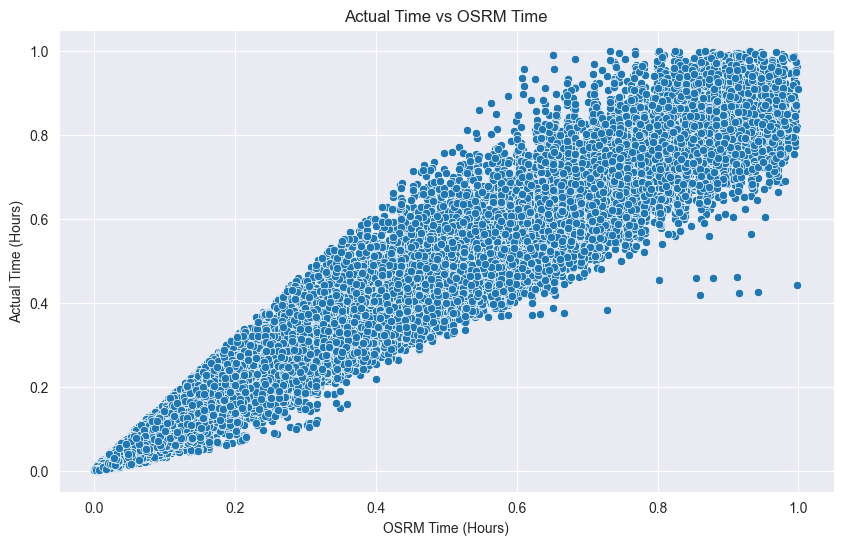

In [25]:

df['trip_duration'] = (pd.to_datetime(df['od_end_time']) - pd.to_datetime(df['od_start_time'])).dt.total_seconds() / 3600


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['trip_duration'], y=df['start_scan_to_end_scan'])
plt.title('Trip Duration vs Start to End Scan Time')
plt.xlabel('Trip Duration (Hours)')
plt.ylabel('Start to End Scan Time (Hours)')
plt.show()





plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['osrm_time'], y=df['actual_time'])
plt.title('Actual Time vs OSRM Time')
plt.xlabel('OSRM Time (Hours)')
plt.ylabel('Actual Time (Hours)')
plt.show()


# Business Insights & Recommendations

In [27]:

busiest_routes = df.groupby(['source_center', 'destination_center']).size().sort_values(ascending=False).head(10)
print("Top 10 Busiest Corridors:")
print(busiest_routes)


avg_delivery_time = df.groupby(['source_center', 'destination_center'])['actual_time'].mean().sort_values()
print("\nAverage Delivery Time by Corridor:")
print(avg_delivery_time)


Top 10 Busiest Corridors:
source_center  destination_center
IND000000ACB   IND562132AAA          1799
               IND712311AAA          1179
IND562132AAA   IND000000ACB           940
IND000000ACB   IND421302AAG           863
IND421302AAG   IND562132AAA           829
               IND000000ACB           711
IND000000ACB   IND501359AAE           706
IND131028AAB   IND000000ACB           685
IND000000ACB   IND131028AAB           666
IND160002AAC   IND000000ACB           654
dtype: int64

Average Delivery Time by Corridor:
source_center  destination_center
IND500039AAB   IND501301AAC          0.002089
IND273155AAA   IND273303AAA          0.002924
IND208006AAA   IND209304AAA          0.003342
IND764059AAA   IND764071AAB          0.003342
IND752050AAA   IND752056AAA          0.004177
                                       ...   
IND110037AAM   IND421302AAG          0.563667
IND562132AAA   IND712311AAA          0.564692
IND110037AAM   IND781018AAB          0.565929
IND421302AAG   IND11003

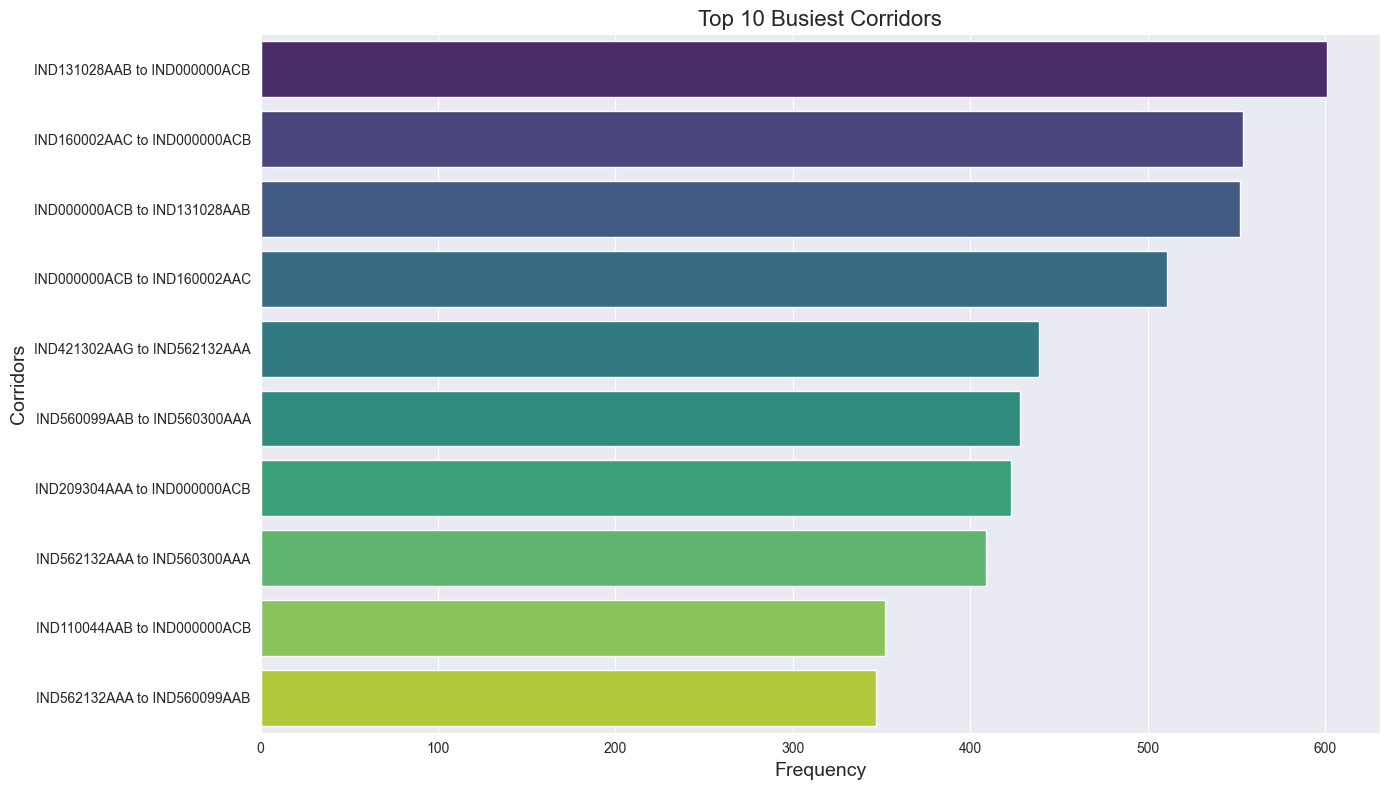

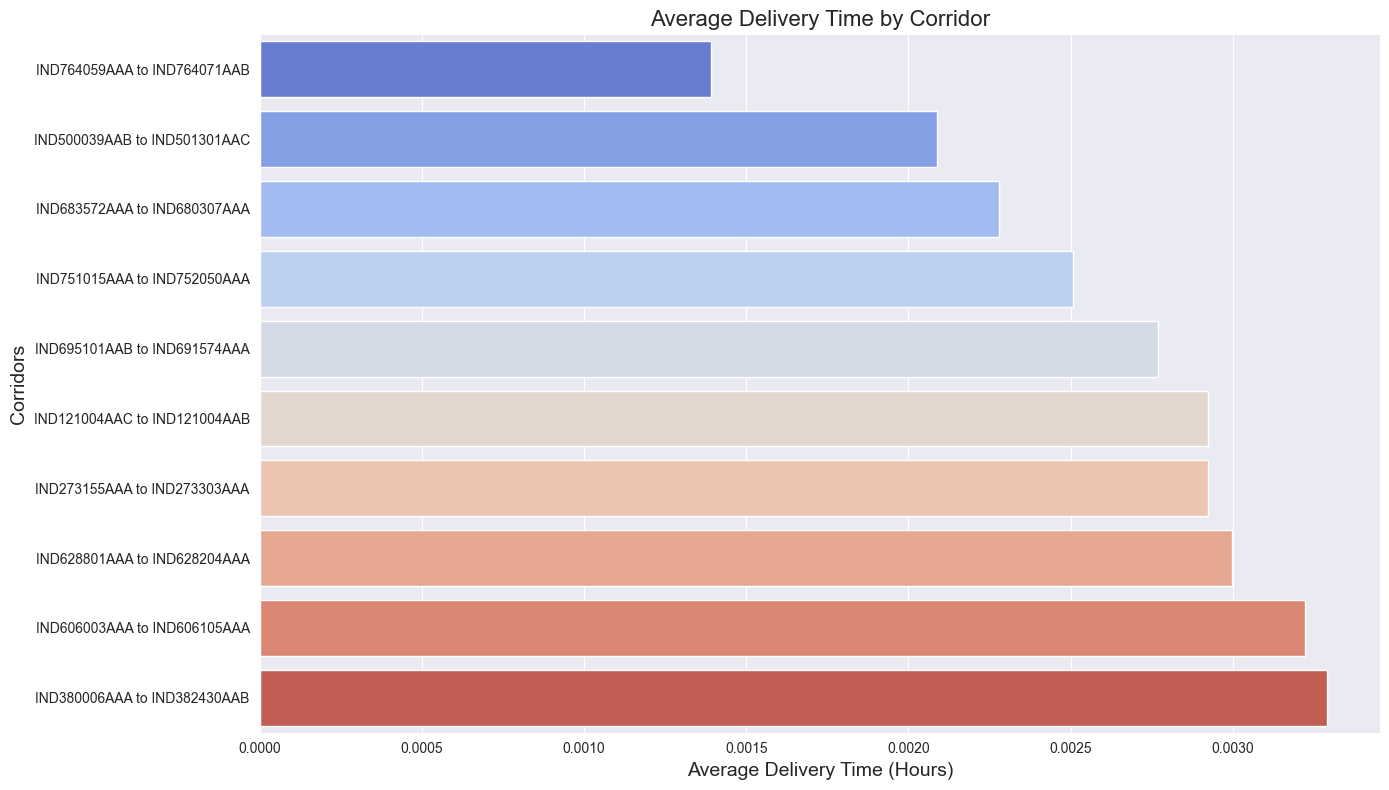

In [32]:
busiest_routes = df.groupby(['source_center', 'destination_center']).size().sort_values(ascending=False).head(10)
busiest_routes_df = busiest_routes.reset_index(name='Frequency')

plt.figure(figsize=(14, 8))
sns.barplot(
    data=busiest_routes_df,
    x='Frequency',
    y=busiest_routes_df['source_center'] + ' to ' + busiest_routes_df['destination_center'],
    hue=busiest_routes_df['source_center'] + ' to ' + busiest_routes_df['destination_center'],
    palette='viridis',
    dodge=False
)
plt.title('Top 10 Busiest Corridors', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Corridors', fontsize=14)
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

avg_delivery_time = df.groupby(['source_center', 'destination_center'])['actual_time'].mean().sort_values().head(10)
avg_delivery_time_df = avg_delivery_time.reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(
    data=avg_delivery_time_df,
    x='actual_time',
    y=avg_delivery_time_df['source_center'] + ' to ' + avg_delivery_time_df['destination_center'],
    hue=avg_delivery_time_df['source_center'] + ' to ' + avg_delivery_time_df['destination_center'],
    palette='coolwarm',
    dodge=False
)
plt.title('Average Delivery Time by Corridor', fontsize=16)
plt.xlabel('Average Delivery Time (Hours)', fontsize=14)
plt.ylabel('Corridors', fontsize=14)
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()
